In [1]:
import numpy as np
import random
import datetime
import matplotlib.pyplot as plt
from itertools import chain, combinations

from Hypergraph_Product_Code_Construction_v3 import HGP_code, Toric3
from peeling_cluster_decoder import combined_peeling_and_cluster_decoder
from make_matrices import *
from multiplexing_VH_decoder import *
from drawing import *
from asssignment_strategies import *
from utilities import generate_erasure_pattern_index_set, generate_random_H_matrix, HGP_code, generate_random_error_index_set_with_erasure_support

Construct a random HGP code

In [2]:
H1 = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=4)
H2 = generate_random_H_matrix(total_bits=10,bit_node_deg=4,check_node_deg=4)
HGP = HGP_code(H1,H2)
print('HGP.num_qubits:' + str(HGP.num_qubits))

HGP.num_qubits:200


Here we use Toric3 (3 by 3 surface code) as a small example for testing.

We have these strategies:

(0. No multiplexing)
1. Random: `randomly_assign_qubits_to_photons(num_multiplexing,num_photons)`
2. Stabilzier based: `photon_assigment_by_stabilizer_support(H,num_multiplexing)`
3. Sudoku: `HGP_different_row_and_col_assign_qubits_to_photons(num_multiplexing,num_photons,HGP_code)`
4. Row-Col: `deterministically_assign_qubits_to_photons(num_multiplexing,num_photons)`
5. Diagonal: `HGP_diagonal_assign_qubits_to_photons(num_multiplexing,HGP_code)`

In [3]:
num_multiplexing=2
num_trials=10
max_erasure_rate=0.5
min_erasure_rate=0
num_steps=6
assignment_type=3 
code = Toric3
# if you call code = HGP, you can use the random code generated above 

In [4]:
dt_start = datetime.datetime.now()
print('start simulation')
print(dt_start)
#dt_start = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

res, assignment, success_rates, success_errors, failure_rates, failure_errors, DFrates, DFerrors, nonDFLErates, nonDFLEerrors, erasure_rates = run_decoder_with_assignment_with_DFLE(
    code=code,
    num_multiplexing=num_multiplexing,
    assignment_type = assignment_type,
    num_trials=num_trials,
    max_erasure_rate=max_erasure_rate,
    min_erasure_rate=min_erasure_rate,
    num_steps=num_steps)

print('simulation finished')
dt_finished = datetime.datetime.now()
print(dt_finished)
#dt_finished = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

start simulation
2024-06-13 14:15:28.963443
simulation finished
2024-06-13 14:15:28.984718


In [5]:
label = "sudoku assingment"
results = label, erasure_rates, failure_rates,failure_errors, DFrates, nonDFLErates
list_of_results = [results]

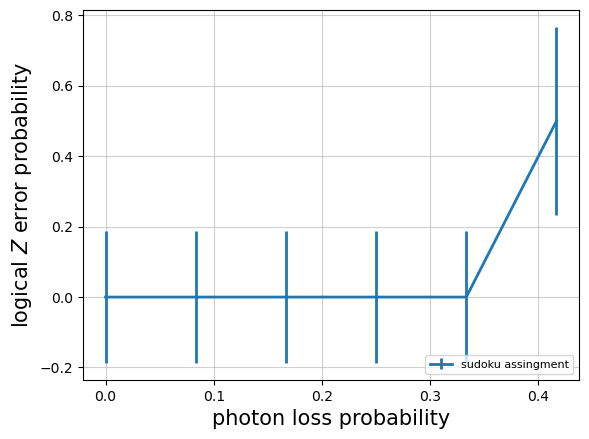

In [6]:
plot_multiple_data(list_of_res=list_of_results, phys_err=erasure_rates, save = False, grid = True, log = False, with_le_and_df=False)